In [1]:
# Creates a playlist of more relevant recommended tracks of a playlist

# install Spotipy first
!pip install Spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='4ab2d73e467840a0a037909857325755' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '0688c1fc60b74f78aa9ab4688b4e1afc' # Client Secret; copy this from your app
username = '31vva7mrcz5plizzsdilol3mpus4' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='http://localhost:3000'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [3]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = '37i9dQZF1DWY6UWUOwj4BO'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
playlist_df.head()

danceability  energy  key  \
Selfish Love (with Selena Gomez) - Acoustic Mix            0.658   0.360    3   
Following The Sun - Acoustic                               0.717   0.506    9   
beau-papa (acoustique)                                     0.645   0.378   10   
Head Shoulders Knees & Toes (feat. Norma Jean M...         0.481   0.392    6   
Mood - Acoustic                                            0.742   0.291   10   

                                                    loudness  mode  \
Selfish Love (with Selena Gomez) - Acoustic Mix       -8.084     1   
Following The Sun - Acoustic                          -7.323     1   
beau-papa (acoustique)                                -5.966     0   
Head Shoulders Knees & Toes (feat. Norma Jean M...   -11.296     0   
Mood - Acoustic                                       -8.170     1   

                                                    speechiness  acousticness  \
Selfish Love (with Selena Gomez) - Acoustic Mix          0.0352         0.893   
Following The Sun - Acoustic                             0.0365         0.809   
beau-papa (acoustique)                                   0.0922         0.599   
Head Shoulders Knees & Toes (feat. Norma Jean M...       0.0281         0.466   
Mood - Acoustic                                          0.0455         0.846   

                                                    instrumentalness  \
Selfish Love (with Selena Gomez) - Acoustic Mix             0.000000   
Following The Sun - Acoustic                                0.000271   
beau-papa (acoustique)                                      0.000000   
Head Shoulders Knees & Toes (feat. Norma Jean M...          0.000097   
Mood - Acoustic                                             0.000000   

                                                    liveness  valence  \
Selfish Love (with Selena Gomez) - Acoustic Mix       0.1160    0.576   
Following The Sun - Acoustic                          0.0907    0.540   
beau-papa (acoustique)                                0.2580    0.396   
Head Shoulders Knees & Toes (feat. Norma Jean M...    0.1360    0.390   
Mood - Acoustic                                       0.1120    0.682   

                                                      tempo            type  \
Selfish Love (with Selena Gomez) - Acoustic Mix     111.076  audio_features   
Following The Sun - Acoustic                        127.025  audio_features   
beau-papa (acoustique)                              119.554  audio_features   
Head Shoulders Knees & Toes (feat. Norma Jean M...   98.675  audio_features   
Mood - Acoustic                                      75.098  audio_features   

                                                                        id  \
Selfish Love (with Selena Gomez) - Acoustic Mix     4Am0QoksGA70r4ZdsgV2Y9   
Following The Sun - Acoustic                        5gyhZCykUqfbjqyPzR4CVe   
beau-papa (acoustique)                              0wRFR5cUtBNArgtw4F1rw1   
Head Shoulders Knees & Toes (feat. Norma Jean M...  07X4FAhX2R6xnAwd6ToUUx   
Mood - Acoustic                                     6TTHXR7QYOUNS2gyy2OVvg   

                                                                                     uri  \
Selfish Love (with Selena Gomez) - Acoustic Mix     spotify:track:4Am0QoksGA70r4ZdsgV2Y9   
Following The Sun - Acoustic                        spotify:track:5gyhZCykUqfbjqyPzR4CVe   
beau-papa (acoustique)                              spotify:track:0wRFR5cUtBNArgtw4F1rw1   
Head Shoulders Knees & Toes (feat. Norma Jean M...  spotify:track:07X4FAhX2R6xnAwd6ToUUx   
Mood - Acoustic                                     spotify:track:6TTHXR7QYOUNS2gyy2OVvg   

                                                                                           track_href  \
Selfish Love (with Selena Gomez) - Acoustic Mix     https://api.spotify.com/v1/tracks/4Am0QoksGA70...   
Following The Sun - Acoustic                        https://api.spotify.com/v1

In [5]:
playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

id  \
Selfish Love (with Selena Gomez) - Acoustic Mix     4Am0QoksGA70r4ZdsgV2Y9   
Following The Sun - Acoustic                        5gyhZCykUqfbjqyPzR4CVe   
beau-papa (acoustique)                              0wRFR5cUtBNArgtw4F1rw1   
Head Shoulders Knees & Toes (feat. Norma Jean M...  07X4FAhX2R6xnAwd6ToUUx   
Mood - Acoustic                                     6TTHXR7QYOUNS2gyy2OVvg   

                                                    acousticness  \
Selfish Love (with Selena Gomez) - Acoustic Mix            0.893   
Following The Sun - Acoustic                               0.809   
beau-papa (acoustique)                                     0.599   
Head Shoulders Knees & Toes (feat. Norma Jean M...         0.466   
Mood - Acoustic                                            0.846   

                                                    danceability  duration_ms  \
Selfish Love (with Selena Gomez) - Acoustic Mix            0.658       169600   
Following The Sun - Acoustic                               0.717       217520   
beau-papa (acoustique)                                     0.645       201280   
Head Shoulders Knees & Toes (feat. Norma Jean M...         0.481       177175   
Mood - Acoustic                                            0.742       161000   

                                                    energy  instrumentalness  \
Selfish Love (with Selena Gomez) - Acoustic Mix      0.360          0.000000   
Following The Sun - Acoustic                         0.506          0.000271   
beau-papa (acoustique)                               0.378          0.000000   
Head Shoulders Knees & Toes (feat. Norma Jean M...   0.392          0.000097   
Mood - Acoustic                                      0.291          0.000000   

                                                    key  liveness  loudness  \
Selfish Love (with Selena Gomez) - Acoustic Mix       3    0.1160    -8.084   
Following The Sun - Acoustic                          9    0.0907    -7.323   
beau-papa (acoustique)                               10    0.2580    -5.966   
Head Shoulders Knees & Toes (feat. Norma Jean M...    6    0.1360   -11.296   
Mood - Acoustic                                      10    0.1120    -8.170   

                                                    mode  speechiness  \
Selfish Love (with Selena Gomez) - Acoustic Mix        1       0.0352   
Following The Sun - Acoustic                           1       0.0365   
beau-papa (acoustique)                                 0       0.0922   
Head Shoulders Knees & Toes (feat. Norma Jean M...     0       0.0281   
Mood - Acoustic                                        1       0.0455   

                                                      tempo  valence  
Selfish Love (with Selena Gomez) - Acoustic Mix     111.076    0.576  
Following The Sun - Acoustic                        127.025    0.540  
beau-papa (acoustique)                              119.554    0.396  
Head Shoulders Knees & Toes (feat. Norma Jean M...   98.675    0.390  
Mood - Acoustic                                      75.098    0.682

## TFIDF on tracks names

In [6]:

#used TFIDF on track names, tracks who have similar titles are prefered !!?

from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(50, 476)

In [7]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-10, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task
import numpy as np
playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 8, 8, 7, 8, 8, 10, 8, 10, 8, 4, 4, 4, 10, 10, 9, 8, 8, 4,10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 8, 8, 7, 8, 8, 10]
playlist_df.head()

id  \
Selfish Love (with Selena Gomez) - Acoustic Mix     4Am0QoksGA70r4ZdsgV2Y9   
Following The Sun - Acoustic                        5gyhZCykUqfbjqyPzR4CVe   
beau-papa (acoustique)                              0wRFR5cUtBNArgtw4F1rw1   
Head Shoulders Knees & Toes (feat. Norma Jean M...  07X4FAhX2R6xnAwd6ToUUx   
Mood - Acoustic                                     6TTHXR7QYOUNS2gyy2OVvg   

                                                    acousticness  \
Selfish Love (with Selena Gomez) - Acoustic Mix            0.893   
Following The Sun - Acoustic                               0.809   
beau-papa (acoustique)                                     0.599   
Head Shoulders Knees & Toes (feat. Norma Jean M...         0.466   
Mood - Acoustic                                            0.846   

                                                    danceability  duration_ms  \
Selfish Love (with Selena Gomez) - Acoustic Mix            0.658       169600   
Following The Sun - Acoustic                               0.717       217520   
beau-papa (acoustique)                                     0.645       201280   
Head Shoulders Knees & Toes (feat. Norma Jean M...         0.481       177175   
Mood - Acoustic                                            0.742       161000   

                                                    energy  instrumentalness  \
Selfish Love (with Selena Gomez) - Acoustic Mix      0.360          0.000000   
Following The Sun - Acoustic                         0.506          0.000271   
beau-papa (acoustique)                               0.378          0.000000   
Head Shoulders Knees & Toes (feat. Norma Jean M...   0.392          0.000097   
Mood - Acoustic                                      0.291          0.000000   

                                                    key  liveness  loudness  \
Selfish Love (with Selena Gomez) - Acoustic Mix       3    0.1160    -8.084   
Following The Sun - Acoustic                          9    0.0907    -7.323   
beau-papa (acoustique)                               10    0.2580    -5.966   
Head Shoulders Knees & Toes (feat. Norma Jean M...    6    0.1360   -11.296   
Mood - Acoustic                                      10    0.1120    -8.170   

                                                    mode  speechiness  \
Selfish Love (with Selena Gomez) - Acoustic Mix        1       0.0352   
Following The Sun - Acoustic                           1       0.0365   
beau-papa (acoustique)                                 0       0.0922   
Head Shoulders Knees & Toes (feat. Norma Jean M...     0       0.0281   
Mood - Acoustic                                        1       0.0455   

                                                      tempo  valence  ratings  
Selfish Love (with Selena Gomez) - Acoustic Mix     111.076    0.576       10  
Following The Sun - Acoustic                        127.025    0.540        9  
beau-papa (acoustique)                              119.554    0.396        9  
Head Shoulders Knees & Toes (feat. Norma Jean M...   98.675    0.390       10  
Mood - Acoustic                                      75.098    0.682        8

## Analyze feature importances

In [8]:

from sklearn.ensemble._forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))


Feature ranking:
1. acousticness 0.169866 
2. danceability 0.139644 
3. duration_ms 0.100391 
4. energy 0.096651 
5. instrumentalness 0.094707 
6. key 0.088481 
7. liveness 0.081965 
8. loudness 0.081397 
9. mode 0.072099 
10. speechiness 0.056207 
11. tempo 0.012836 
12. valence 0.005754 


It seems like acousticness and danceability are very important features in our case 

## Apply pca to the scaled train set 

Principal Components Analysis (PCA) is an algorithm to transform the columns of a dataset into a new set of features called Principal Components. By doing this, a large chunk of the information across the full dataset is effectively compressed in fewer feature columns. This enables dimensionality reduction and ability to visualize the separation of classes or clusters if any.

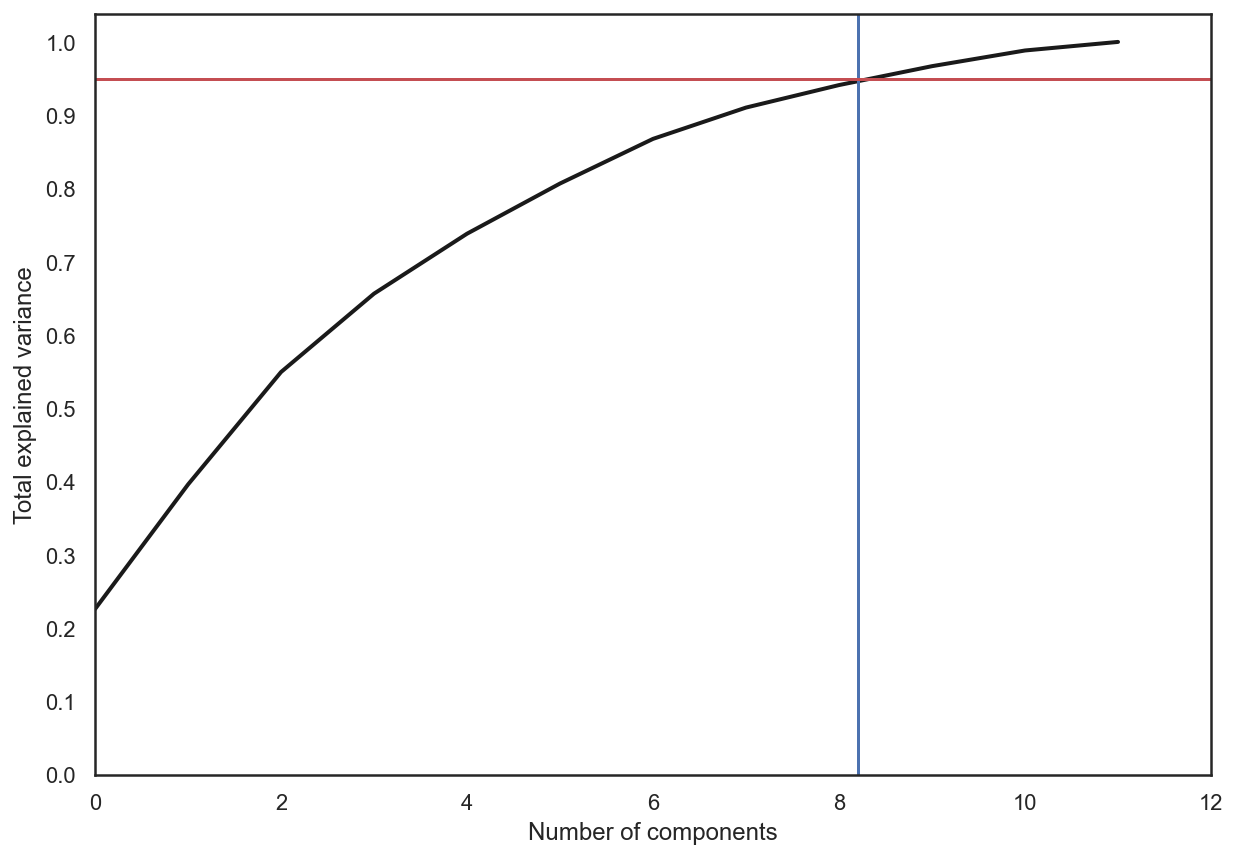

In [9]:

#PCA reduces the dimensions which makes our model's performance faster 

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#before applying PCA, we need to scale our dataset 
X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.axvline(8.2, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r') # 95% cut-off threshold 
plt.show();

In [10]:
#looking at the graph, the optimal nb of components ( intersection between the cumulative sum od PCA explained variance and horiz + vertical lines )
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [11]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

Difference between PCA and t-SNE :
    

## Matrix with the new components ( PCA ) 

In [12]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

Grid search makes the training process more optimized 

In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Let's try different ML models and see the results of each one of them 

### Decision Tree

In [14]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


(DecisionTreeClassifier(max_depth=6, max_features=4), 0.33999999999999997)

### Random Forest 

In [15]:


parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

#possibility of tuning this model by picking other values for max_features, min_samle_leaf ....

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(RandomForestClassifier(max_depth=3, max_features=4, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.32)

### KNN

In [16]:

from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'n_neighbors': 8}, 0.27999999999999997)

In [17]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/4))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

danceability  energy  key  loudness  mode  \
3yFFIGLByW4gG7U7ogIHPd         0.686   0.885    7    -4.485     1   
7ebgqt3yMeBjTUVa8IYHMf         0.742   0.757    0    -2.886     0   
0WqVZrjPZUnRCsBzA9mdVc         0.760   0.692    8    -7.627     0   
0lXMcNaciFJJgiL88LniCe         0.619   0.804    0    -6.881     0   
5FgaliVjl9EQzIVK7xMkKP         0.665   0.580    9    -4.421     0   

                        speechiness  acousticness  instrumentalness  liveness  \
3yFFIGLByW4gG7U7ogIHPd       0.0460      0.006420          0.000000    0.2910   
7ebgqt3yMeBjTUVa8IYHMf       0.0508      0.381000          0.000179    0.0664   
0WqVZrjPZUnRCsBzA9mdVc       0.0579      0.084700          0.018600    0.3810   
0lXMcNaciFJJgiL88LniCe       0.0576      0.000362          0.010800    0.1930   
5FgaliVjl9EQzIVK7xMkKP       0.0263      0.345000          0.000000    0.1880   

                        valence    tempo            type  \
3yFFIGLByW4gG7U7ogIHPd    0.263  103.006  audio_features   
7ebgqt3yMeBjTUVa8IYHMf    0.962  175.987  audio_features   
0WqVZrjPZUnRCsBzA9mdVc    0.484  124.043  audio_features   
0lXMcNaciFJJgiL88LniCe    0.507  123.911  audio_features   
5FgaliVjl9EQzIVK7xMkKP    0.251  124.045  audio_features   

                                            id  \
3yFFIGLByW4gG7U7ogIHPd  3yFFIGLByW4gG7U7ogIHPd   
7ebgqt3yMeBjTUVa8IYHMf  7ebgqt3yMeBjTUVa8IYHMf   
0WqVZrjPZUnRCsBzA9mdVc  0WqVZrjPZUnRCsBzA9mdVc   
0lXMcNaciFJJgiL88LniCe  0lXMcNaciFJJgiL88LniCe   
5FgaliVjl9EQzIVK7xMkKP  5FgaliVjl9EQzIVK7xMkKP   

                                                         uri  \
3yFFIGLByW4gG7U7ogIHPd  spotify:track:3yFFIGLByW4gG7U7ogIHPd   
7ebgqt3yMeBjTUVa8IYHMf  spotify:track:7ebgqt3yMeBjTUVa8IYHMf   
0WqVZrjPZUnRCsBzA9mdVc  spotify:track:0WqVZrjPZUnRCsBzA9mdVc   
0lXMcNaciFJJgiL88LniCe  spotify:track:0lXMcNaciFJJgiL88LniCe   
5FgaliVjl9EQzIVK7xMkKP  spotify:track:5FgaliVjl9EQzIVK7xMkKP   

                                                               track_href  \
3yFFIGLByW4gG7U7ogIHPd  https://api.spotify.com/v1/tracks/3yFFIGLByW4g...   
7ebgqt3yMeBjTUVa8IYHMf  https://api.spotify.com/v1/tracks/7ebgqt3yMeBj...   
0WqVZrjPZUnRCsBzA9mdVc  https://api.spotify.com/v1/tracks/0WqVZrjPZUnR...   
0lXMcNaciFJJgiL88LniCe  https://api.spotify.com/v1/tracks/0lXMcNaciFJJ...   
5FgaliVjl9EQzIVK7xMkKP  https://api.spotify.com/v1/tracks/5FgaliVjl9EQ...   

                                                             analysis_url  \
3yFFIGLByW4gG7U7ogIHPd  https://api.spotify.com/v1/audio-analysis/3yFF...   
7ebgqt3yMeBjTUVa8IYHMf  https://api.spotify.com/v1/audio-analysis/7ebg...   
0WqVZrjPZUnRCsBzA9mdVc  https://api.spotify.com/v1/audio-analysis/0WqV...   
0lXMcNaciFJJgiL88LniCe  https://api.spotify.com/v1/audio-analysis/0lXM...   
5FgaliVjl9EQzIVK7xMkKP  https://api.spotify.com/v1/audio-analysis/5Fga...   

                        duration_ms  time_signature  
3yFFIGLByW4gG7U7ogIHPd       224587               4  
7ebgqt3yMeBjTUVa8IYHMf       182229               4  
0WqVZrjPZUnRCsBzA9mdVc       189677               4  
0lXMcNaciFJJgiL88LniCe       162581               4  
5FgaliVjl9EQzIVK7xMkKP       149827               3

In [18]:
rec_tracks

[{'album': {'album_type': 'SINGLE',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/77AiFEVeAVj2ORpC85QVJs'},
     'href': 'https://api.spotify.com/v1/artists/77AiFEVeAVj2ORpC85QVJs',
     'id': '77AiFEVeAVj2ORpC85QVJs',
     'name': 'Steve Aoki',
     'type': 'artist',
     'uri': 'spotify:artist:77AiFEVeAVj2ORpC85QVJs'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/329e4yvIujISKGKz1BZZbO'},
     'href': 'https://api.spotify.com/v1/artists/329e4yvIujISKGKz1BZZbO',
     'id': '329e4yvIujISKGKz1BZZbO',
     'name': 'Farruko',
     'type': 'artist',
     'uri': 'spotify:artist:329e4yvIujISKGKz1BZZbO'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CH',
    'CI',
    'CL',
    'CM'

In [19]:
X_test_names = v.transform(rec_track_names)

In [20]:
X_test_names

<588x476 sparse matrix of type '<class 'numpy.float64'>'
	with 967 stored elements in Compressed Sparse Row format>

In [21]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [22]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [24]:
rec_playlist_df

acousticness  danceability  duration_ms  energy  \
3yFFIGLByW4gG7U7ogIHPd      0.006420         0.686       224587   0.885   
7ebgqt3yMeBjTUVa8IYHMf      0.381000         0.742       182229   0.757   
0WqVZrjPZUnRCsBzA9mdVc      0.084700         0.760       189677   0.692   
0lXMcNaciFJJgiL88LniCe      0.000362         0.619       162581   0.804   
5FgaliVjl9EQzIVK7xMkKP      0.345000         0.665       149827   0.580   
...                              ...           ...          ...     ...   
3hOWsTM9OpI6c72iQHP4EB      0.877000         0.627       199463   0.213   
6QTKXysUONXLaEgGuwFPOL      0.629000         0.687       162273   0.333   
30kLC24uAzd0WJCyutcV0t      0.694000         0.664       219378   0.302   
1iQ1BpOGF1Umd3lpTV4OPO      0.954000         0.641       166943   0.147   
5nMRpGfqQ0tb1TMbqBVK2J      0.914000         0.528       157467   0.291   

                        instrumentalness  key  liveness  loudness  mode  \
3yFFIGLByW4gG7U7ogIHPd          0.000000    7    0.2910    -4.485     1   
7ebgqt3yMeBjTUVa8IYHMf          0.000179    0    0.0664    -2.886     0   
0WqVZrjPZUnRCsBzA9mdVc          0.018600    8    0.3810    -7.627     0   
0lXMcNaciFJJgiL88LniCe          0.010800    0    0.1930    -6.881     0   
5FgaliVjl9EQzIVK7xMkKP          0.000000    9    0.1880    -4.421     0   
...                                  ...  ...       ...       ...   ...   
3hOWsTM9OpI6c72iQHP4EB          0.000000   10    0.2040   -12.634     1   
6QTKXysUONXLaEgGuwFPOL          0.000000    7    0.1760    -7.858     0   
30kLC24uAzd0WJCyutcV0t          0.000000    6    0.1390   -11.694     1   
1iQ1BpOGF1Umd3lpTV4OPO          0.000002   11    0.1110   -14.812     1   
5nMRpGfqQ0tb1TMbqBVK2J          0.000000   10    0.1210    -9.696     1   

                        speechiness    tempo  valence  
3yFFIGLByW4gG7U7ogIHPd       0.0460  103.006    0.263  
7ebgqt3yMeBjTUVa8IYHMf       0.0508  175.987    0.962  
0WqVZrjPZUnRCsBzA9mdVc       0.0579  124.043    0.484  
0lXMcNaciFJJgiL88LniCe       0.0576  123.911    0.507  
5FgaliVjl9EQzIVK7xMkKP       0.0263  124.045    0.251  
...                             ...      ...      ...  
3hOWsTM9OpI6c72iQHP4EB       0.0349   92.054    0.180  
6QTKXysUONXLaEgGuwFPOL       0.0293  109.969    0.317  
30kLC24uAzd0WJCyutcV0t       0.0499  146.089    0.592  
1iQ1BpOGF1Umd3lpTV4OPO       0.0337  111.913    0.287  
5nMRpGfqQ0tb1TMbqBVK2J       0.0401   76.805    0.355  

[588 rows x 12 columns]

In [25]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()


In [26]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==8]['index'].values.tolist()

In [31]:
recs_to_add# a list of the recommended songs

AttributeError: 'list' object has no attribute 'length'

In [32]:
recs_to_add=recs_to_add[0:53]

In [33]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(588, (588, 14), 53)

In [35]:
rec_array = np.reshape(recs_to_add, (1, 53))

In [36]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='Recommended_playlist for - {}'.format(sourcePlaylist['name']))


In [37]:
# Add tracks to the new playlist
for i in rec_array:
    sp.user_playlist_add_tracks(username, playlist_recs['id'], i);

In [ ]:
# This performed really well for my case, and I am pretty satisfied with the resulting playlist -more than the default recommendations